컬럼명 확인:
 Index(['접수연도', '자치구명', '물건금액(만원)'], dtype='object')
샘플 데이터:
    접수연도 자치구명  물건금액(만원)
0  2022  중랑구     16000
1  2022  광진구    105000
2  2022  강남구     69000
3  2022  성동구     13500
4  2022  강동구     22500


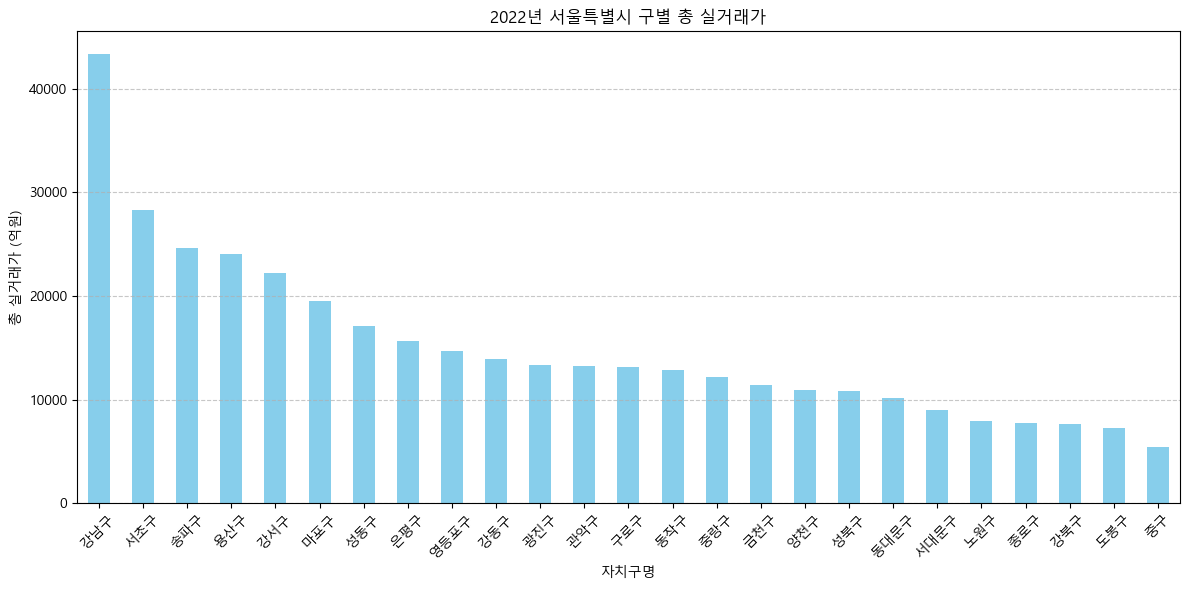

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ✅ 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'  
plt.rcParams['axes.unicode_minus'] = False

# 1. CSV 파일 읽기
df = pd.read_csv('서울시 부동산 실거래가 정보 2022.csv', encoding='EUC-KR')

# 2. 데이터 확인
print("컬럼명 확인:\n", df.columns)
print("샘플 데이터:\n", df.head())

# 3. 필요한 컬럼명 지정
price_col = '물건금액(만원)'  
gu_col = '자치구명'

# 4. 금액 전처리 (쉼표 제거 후 정수로 변환)
df[price_col] = df[price_col].astype(str).str.replace(",", "", regex=False).astype(int)

# 5. 구별 실거래 총액 계산
gu_sum = df.groupby(gu_col)[price_col].sum().sort_values(ascending=False)

# 6. 단위 변환: 만원 → 억원
gu_sum = gu_sum / 10000  # 1억 = 10,000만원

# 7. 그래프 그리기
plt.figure(figsize=(12, 6))
gu_sum.plot(kind='bar', color='skyblue')
plt.title('2022년 서울특별시 구별 총 실거래가')
plt.xlabel('자치구명')
plt.ylabel('총 실거래가 (억원)')  # 단위 명시
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\정용희\AppData\Local\Temp\ipykernel_18564\3028235350.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(merged['자치구명'], rotation=45, ha='right')


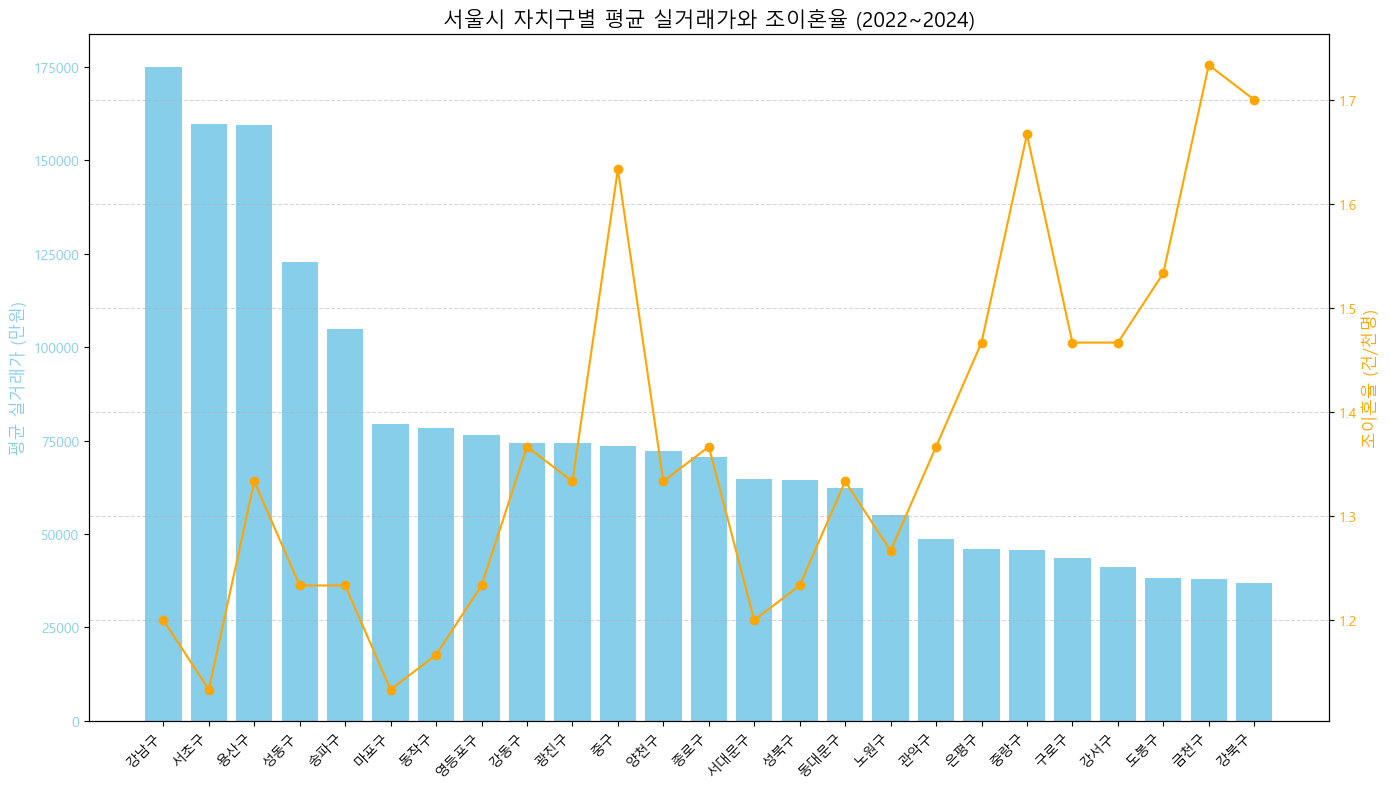

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False

# 🔧 파일 불러오기
files = {
    2022: "서울시 부동산 실거래가 정보 2022.csv",
    2023: "서울시 부동산 실거래가 정보 2023.csv",
    2024: "서울시 부동산 실거래가 정보 2024.csv"
}
divorce_file = "이혼건수+및+조이혼율_20250522165332.xlsx"

# ✅ 실거래가 통합
all_prices = []
for year, path in files.items():
    df = pd.read_csv(path, encoding='EUC-KR')
    df = df[['자치구명', '물건금액(만원)']].copy()
    df['물건금액(만원)'] = df['물건금액(만원)'].astype(str).str.replace(',', '').astype(int)
    df['연도'] = year
    all_prices.append(df)
price_df = pd.concat(all_prices)
price_avg = price_df.groupby('자치구명')['물건금액(만원)'].mean().reset_index()
price_avg.rename(columns={'물건금액(만원)': '평균실거래가(만원)'}, inplace=True)

# ✅ 조이혼율 처리
divorce_df = pd.read_excel(divorce_file)
divorce_df = divorce_df[['자치구별(2)', '2022.1', '2023.1', '2024.1']]
divorce_df.rename(columns={'자치구별(2)': '자치구명'}, inplace=True)
divorce_df = divorce_df[divorce_df['자치구명'].str.endswith('구')]
divorce_df['조이혼율'] = divorce_df[['2022.1', '2023.1', '2024.1']].mean(axis=1)
divorce_avg = divorce_df[['자치구명', '조이혼율']]

# ✅ 병합
merged = pd.merge(price_avg, divorce_avg, on='자치구명')
merged = merged.sort_values('평균실거래가(만원)', ascending=False)

# ✅ 시각화: 이중 y축 그래프
fig, ax1 = plt.subplots(figsize=(14, 8))

# 첫 번째 Y축 (실거래가)
ax1.bar(merged['자치구명'], merged['평균실거래가(만원)'], color='skyblue', label='평균 실거래가 (만원)')
ax1.set_ylabel('평균 실거래가 (만원)', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# 두 번째 Y축 (조이혼율)
ax2 = ax1.twinx()
ax2.plot(merged['자치구명'], merged['조이혼율'], color='orange', marker='o', label='조이혼율 (건/천명)')
ax2.set_ylabel('조이혼율 (건/천명)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 기타 설정
plt.title('서울시 자치구별 평균 실거래가와 조이혼율 (2022~2024)', fontsize=15)
ax1.set_xticklabels(merged['자치구명'], rotation=45, ha='right')
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


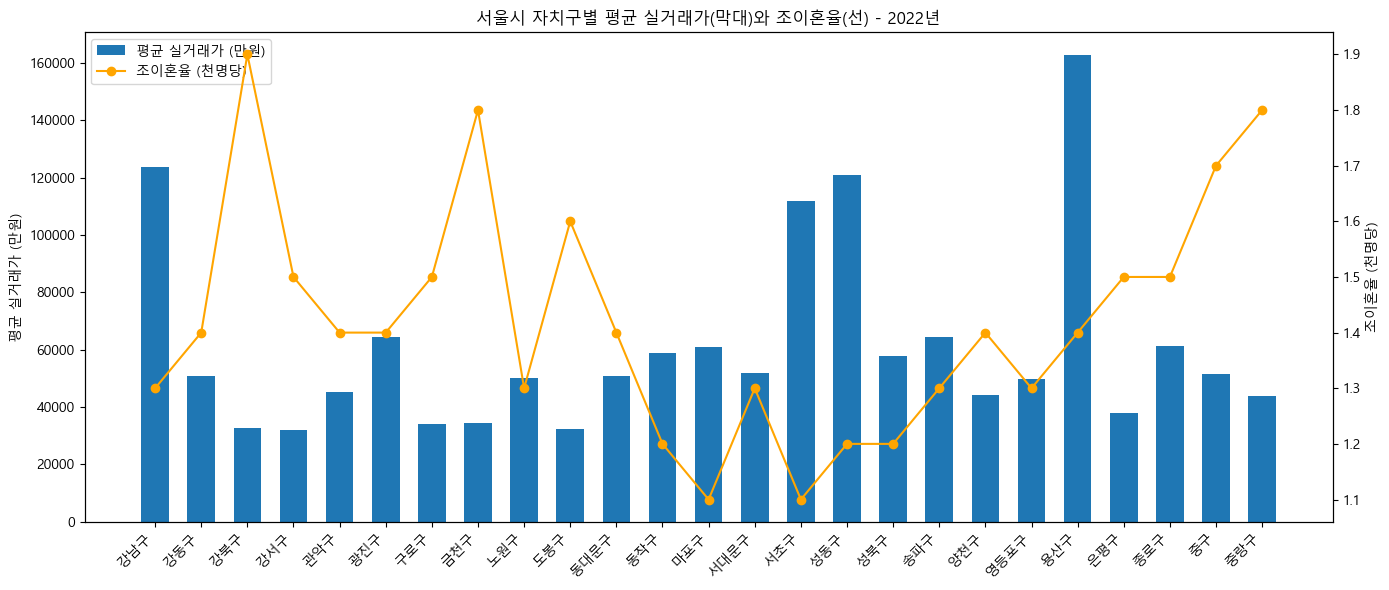

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  


plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
real_estate_df = pd.read_csv("서울시 부동산 실거래가 정보 2022.csv", encoding='euc-kr')
divorce_df = pd.read_excel("이혼건수+및+조이혼율_20250522165332.xlsx", header=1)

# 실거래가: 자치구별 평균
real_estate_by_gu = real_estate_df.groupby("자치구명")["물건금액(만원)"].mean().reset_index()
real_estate_by_gu.columns = ["자치구", "평균실거래가"]

# 조이혼율: 자치구별 추출
divorce_by_gu = divorce_df[["자치구별(2)", "조이혼율 (천명당)"]].dropna()
divorce_by_gu.columns = ["자치구", "조이혼율"]

# 병합
merged_df = pd.merge(real_estate_by_gu, divorce_by_gu, on="자치구")
merged_df = merged_df.sort_values(by="자치구")

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 6))

x = np.arange(len(merged_df["자치구"]))
bar_width = 0.6

# 실거래가 막대그래프
bars = ax1.bar(x, merged_df["평균실거래가"], bar_width, label="평균 실거래가 (만원)")
ax1.set_ylabel("평균 실거래가 (만원)")
ax1.set_xticks(x)
ax1.set_xticklabels(merged_df["자치구"], rotation=45, ha='right')

# 조이혼율 선그래프
ax2 = ax1.twinx()
line = ax2.plot(x, merged_df["조이혼율"], color='orange', marker='o', label="조이혼율 (천명당)")
ax2.set_ylabel("조이혼율 (천명당)")

# 범례
lines_labels = [bars, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper left')

plt.title("서울시 자치구별 평균 실거래가(막대)와 조이혼율(선) - 2022년")
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


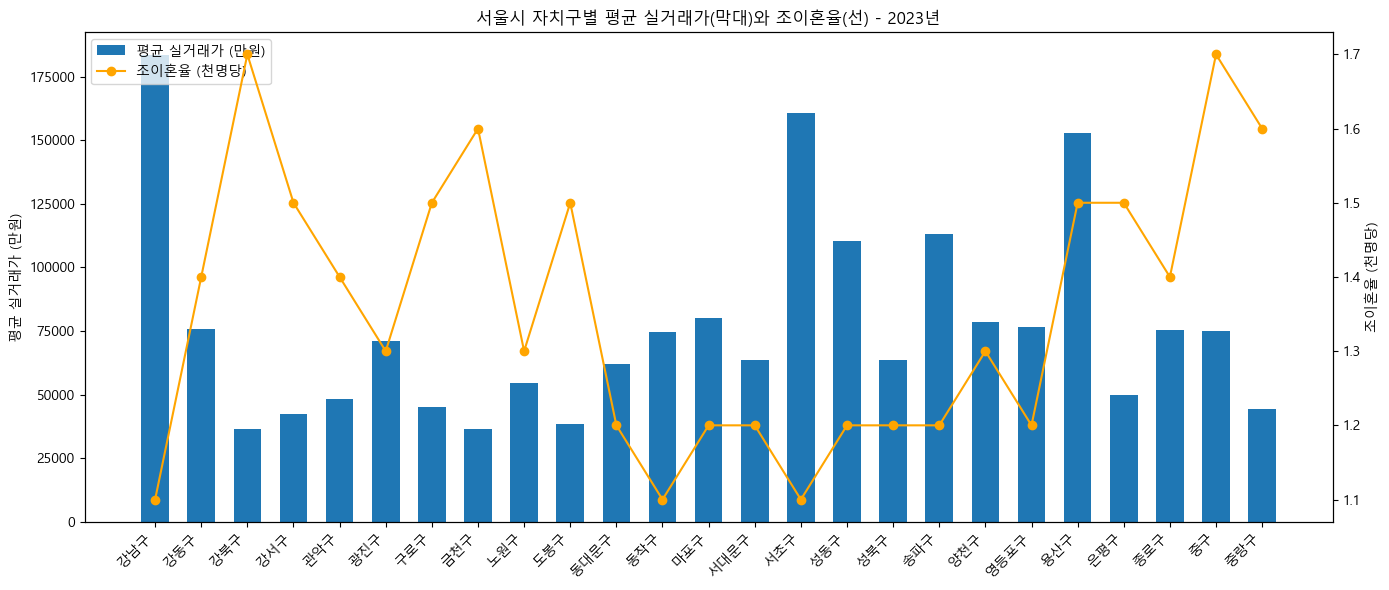

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' 


plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
real_estate_df = pd.read_csv("서울시 부동산 실거래가 정보 2023.csv", encoding='euc-kr')
divorce_df = pd.read_excel("이혼건수+및+조이혼율_20250522165332.xlsx", header=1)

# 실거래가: 자치구별 평균
real_estate_by_gu = real_estate_df.groupby("자치구명")["물건금액(만원)"].mean().reset_index()
real_estate_by_gu.columns = ["자치구", "평균실거래가"]

# 조이혼율: 자치구별 추출
divorce_by_gu = divorce_df[["자치구별(2)", "조이혼율 (천명당).1"]].dropna()
divorce_by_gu.columns = ["자치구", "조이혼율"]

# 병합
merged_df = pd.merge(real_estate_by_gu, divorce_by_gu, on="자치구")
merged_df = merged_df.sort_values(by="자치구")

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 6))

x = np.arange(len(merged_df["자치구"]))
bar_width = 0.6

# 실거래가 막대그래프
bars = ax1.bar(x, merged_df["평균실거래가"], bar_width, label="평균 실거래가 (만원)")
ax1.set_ylabel("평균 실거래가 (만원)")
ax1.set_xticks(x)
ax1.set_xticklabels(merged_df["자치구"], rotation=45, ha='right')

# 조이혼율 선그래프
ax2 = ax1.twinx()
line = ax2.plot(x, merged_df["조이혼율"], color='orange', marker='o', label="조이혼율 (천명당)")
ax2.set_ylabel("조이혼율 (천명당)")

# 범례
lines_labels = [bars, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper left')

plt.title("서울시 자치구별 평균 실거래가(막대)와 조이혼율(선) - 2023년")
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


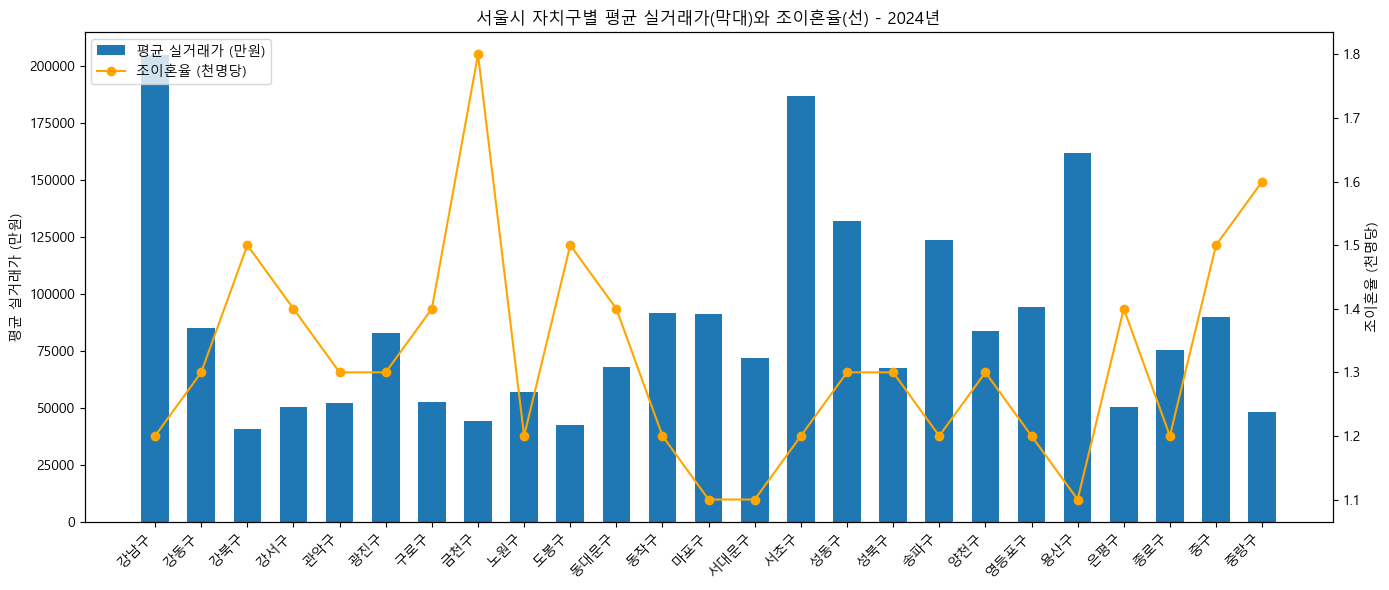

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  


plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
real_estate_df = pd.read_csv("서울시 부동산 실거래가 정보 2024.csv", encoding='euc-kr')
divorce_df = pd.read_excel("이혼건수+및+조이혼율_20250522165332.xlsx", header=1)

# 실거래가: 자치구별 평균
real_estate_by_gu = real_estate_df.groupby("자치구명")["물건금액(만원)"].mean().reset_index()
real_estate_by_gu.columns = ["자치구", "평균실거래가"]

# 조이혼율: 자치구별 추출
divorce_by_gu = divorce_df[["자치구별(2)", "조이혼율 (천명당).2"]].dropna()
divorce_by_gu.columns = ["자치구", "조이혼율"]

# 병합
merged_df = pd.merge(real_estate_by_gu, divorce_by_gu, on="자치구")
merged_df = merged_df.sort_values(by="자치구")

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 6))

x = np.arange(len(merged_df["자치구"]))
bar_width = 0.6

# 실거래가 막대그래프
bars = ax1.bar(x, merged_df["평균실거래가"], bar_width, label="평균 실거래가 (만원)")
ax1.set_ylabel("평균 실거래가 (만원)")
ax1.set_xticks(x)
ax1.set_xticklabels(merged_df["자치구"], rotation=45, ha='right')

# 조이혼율 선그래프
ax2 = ax1.twinx()
line = ax2.plot(x, merged_df["조이혼율"], color='orange', marker='o', label="조이혼율 (천명당)")
ax2.set_ylabel("조이혼율 (천명당)")

# 범례
lines_labels = [bars, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper left')

plt.title("서울시 자치구별 평균 실거래가(막대)와 조이혼율(선) - 2024년")
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


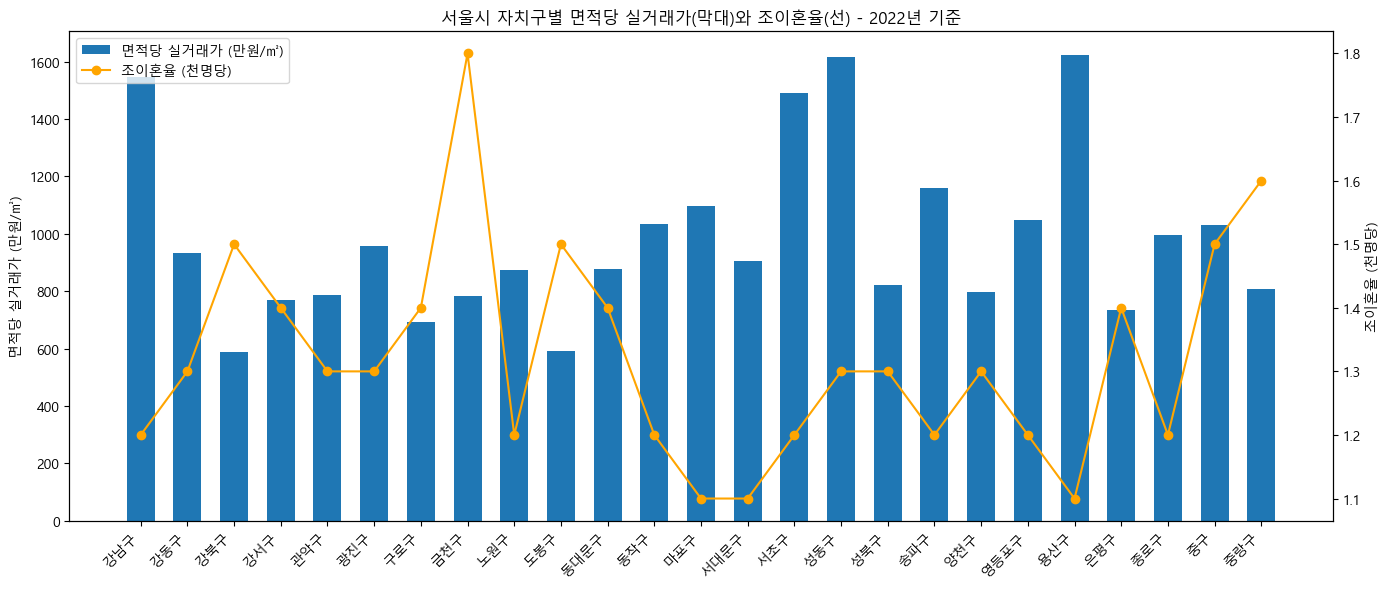

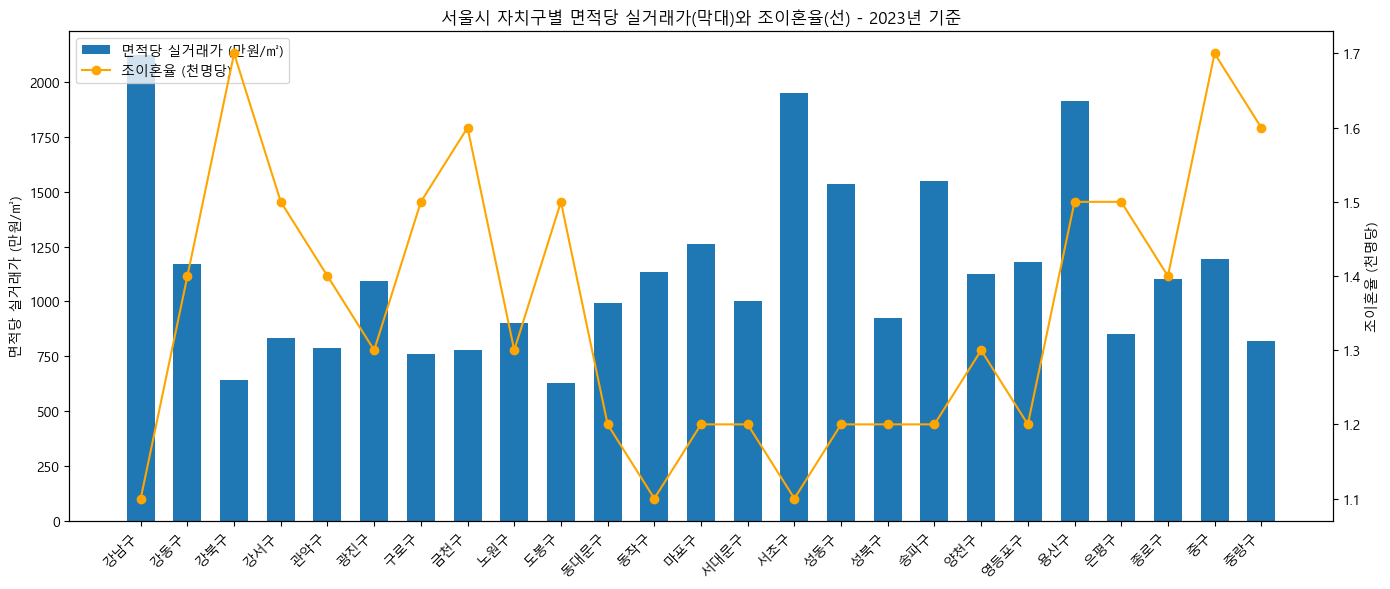

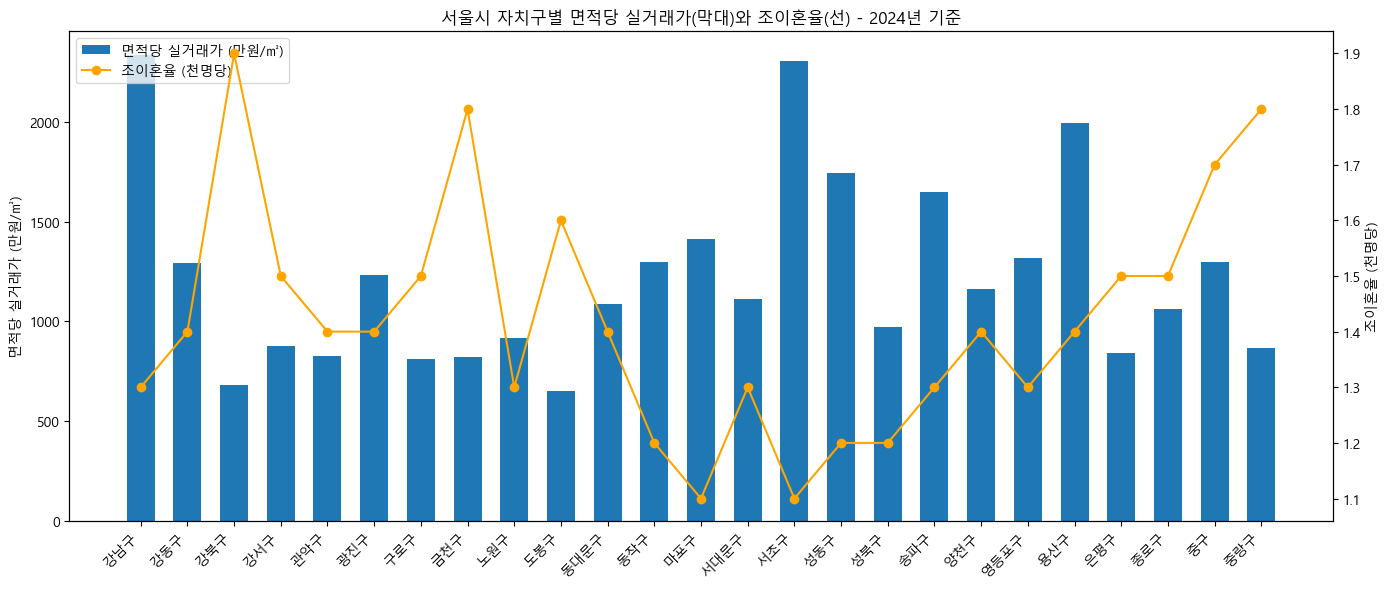

In [6]:
# 1. 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2. 한글 폰트 설정 (필요시)
plt.rcParams['font.family'] = 'Malgun Gothic'  
plt.rcParams['axes.unicode_minus'] = False

# 3. 공통 함수 정의
def prepare_data(real_estate_df, divorce_df, year_label):
    # 면적당 실거래가 계산
    real_estate_df["면적당실거래가"] = real_estate_df["물건금액(만원)"] / real_estate_df["건물면적(㎡)"]
    area_price = real_estate_df.groupby("자치구명")["면적당실거래가"].mean().reset_index()
    area_price.columns = ["자치구", "면적당실거래가"]

    # 조이혼율 열 선택
    if year_label == 2022:
        divorce_col = "조이혼율 (천명당).2"
    elif year_label == 2023:
        divorce_col = "조이혼율 (천명당).1"
    elif year_label == 2024:
        divorce_col = "조이혼율 (천명당)"
    else:
        raise ValueError("지원되지 않는 연도입니다.")

    divorce_data = divorce_df[["자치구별(2)", divorce_col]].dropna()
    divorce_data.columns = ["자치구", "조이혼율"]

    # 병합
    merged = pd.merge(area_price, divorce_data, on="자치구").sort_values("자치구")
    return merged

def plot_area_price_vs_divorce(df, year):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    x = np.arange(len(df["자치구"]))
    bar_width = 0.6

    bars = ax1.bar(x, df["면적당실거래가"], bar_width, label="면적당 실거래가 (만원/㎡)")
    ax1.set_ylabel("면적당 실거래가 (만원/㎡)")
    ax1.set_xticks(x)
    ax1.set_xticklabels(df["자치구"], rotation=45, ha='right')

    ax2 = ax1.twinx()
    line = ax2.plot(x, df["조이혼율"], color='orange', marker='o', label="조이혼율 (천명당)")
    ax2.set_ylabel("조이혼율 (천명당)")

    lines_labels = [bars, line[0]]
    labels = [l.get_label() for l in lines_labels]
    ax1.legend(lines_labels, labels, loc='upper left')

    plt.title(f"서울시 자치구별 면적당 실거래가(막대)와 조이혼율(선) - {year}년 기준")
    plt.tight_layout()
    plt.show()

# 4. 데이터 불러오기
real_estate_2022 = pd.read_csv("서울시 부동산 실거래가 정보 2022 FF.csv", encoding="euc-kr")
real_estate_2023 = pd.read_csv("서울시 부동산 실거래가 정보 2023 FF.csv", encoding="euc-kr")
real_estate_2024 = pd.read_csv("서울시 부동산 실거래가 정보 2024FF.csv", encoding="euc-kr")
divorce_df = pd.read_excel("이혼건수+및+조이혼율_20250522165332.xlsx", header=1)

# 5. 각 연도별 데이터 처리
merged_2022 = prepare_data(real_estate_2022, divorce_df, 2022)
merged_2023 = prepare_data(real_estate_2023, divorce_df, 2023)
merged_2024 = prepare_data(real_estate_2024, divorce_df, 2024)

# 6. 시각화
plot_area_price_vs_divorce(merged_2022, 2022)
plot_area_price_vs_divorce(merged_2023, 2023)
plot_area_price_vs_divorce(merged_2024, 2024)


C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


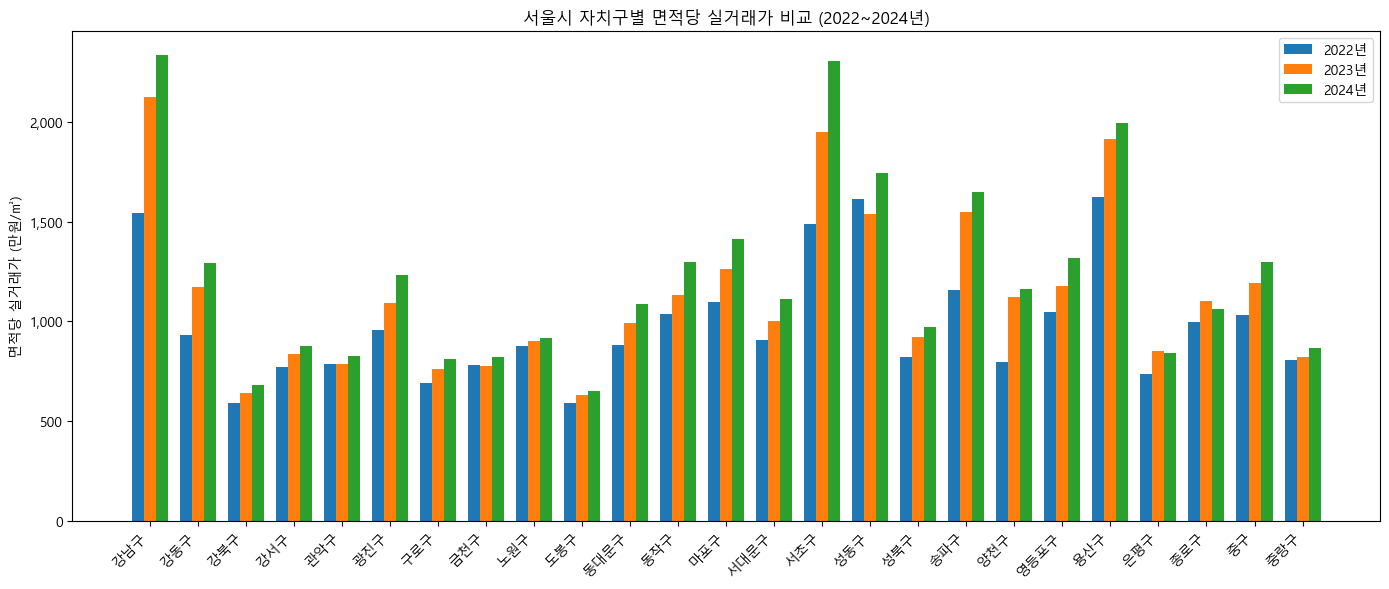

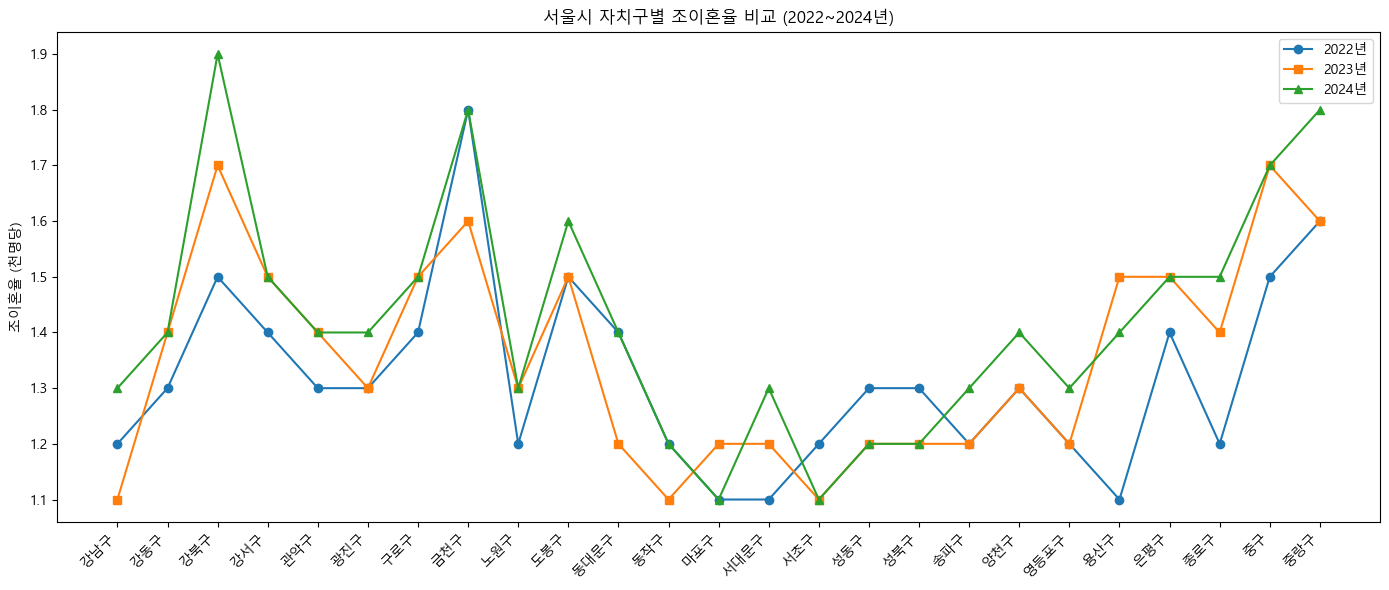

In [7]:
# 1. 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# 2. 한글 깨짐 방지 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 3. 데이터 불러오기
real_estate_2022 = pd.read_csv("서울시 부동산 실거래가 정보 2022 FF.csv", encoding="euc-kr")
real_estate_2023 = pd.read_csv("서울시 부동산 실거래가 정보 2023 FF.csv", encoding="euc-kr")
real_estate_2024 = pd.read_csv("서울시 부동산 실거래가 정보 2024FF.csv", encoding="euc-kr")
divorce_df = pd.read_excel("이혼건수+및+조이혼율_20250522165332.xlsx", header=1)

# 4. 함수 정의: 연도별 데이터 처리
def get_yearly_summary(real_estate_df, divorce_df, year_label):
    real_estate_df["면적당실거래가"] = real_estate_df["물건금액(만원)"] / real_estate_df["건물면적(㎡)"]
    area_price = real_estate_df.groupby("자치구명")["면적당실거래가"].mean().reset_index()
    area_price.columns = ["자치구", f"{year_label}_면적당실거래가"]

    if year_label == 2022:
        divorce_col = "조이혼율 (천명당).2"
    elif year_label == 2023:
        divorce_col = "조이혼율 (천명당).1"
    elif year_label == 2024:
        divorce_col = "조이혼율 (천명당)"
    else:
        raise ValueError("해당 연도에 대한 열 없음")

    divorce_data = divorce_df[["자치구별(2)", divorce_col]].dropna()
    divorce_data.columns = ["자치구", f"{year_label}_조이혼율"]

    return pd.merge(area_price, divorce_data, on="자치구")

# 5. 연도별 평균 데이터 생성
summary_2022 = get_yearly_summary(real_estate_2022, divorce_df, 2022)
summary_2023 = get_yearly_summary(real_estate_2023, divorce_df, 2023)
summary_2024 = get_yearly_summary(real_estate_2024, divorce_df, 2024)

# 6. 하나로 병합
merged_all = summary_2022.merge(summary_2023, on="자치구").merge(summary_2024, on="자치구")
merged_all = merged_all.sort_values("자치구")

# 7. 시각화 - 면적당 실거래가 막대 그래프
x = np.arange(len(merged_all["자치구"]))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(x - bar_width, merged_all["2022_면적당실거래가"], bar_width, label="2022년")
ax.bar(x, merged_all["2023_면적당실거래가"], bar_width, label="2023년")
ax.bar(x + bar_width, merged_all["2024_면적당실거래가"], bar_width, label="2024년")

ax.set_xticks(x)
ax.set_xticklabels(merged_all["자치구"], rotation=45, ha='right')
ax.set_ylabel("면적당 실거래가 (만원/㎡)")
ax.set_title("서울시 자치구별 면적당 실거래가 비교 (2022~2024년)")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.legend()
plt.tight_layout()
plt.show()

# 8. 시각화 - 조이혼율 선 그래프
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(x, merged_all["2022_조이혼율"], marker='o', label="2022년")
ax.plot(x, merged_all["2023_조이혼율"], marker='s', label="2023년")
ax.plot(x, merged_all["2024_조이혼율"], marker='^', label="2024년")

ax.set_xticks(x)
ax.set_xticklabels(merged_all["자치구"], rotation=45, ha='right')
ax.set_ylabel("조이혼율 (천명당)")
ax.set_title("서울시 자치구별 조이혼율 비교 (2022~2024년)")
ax.legend()
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


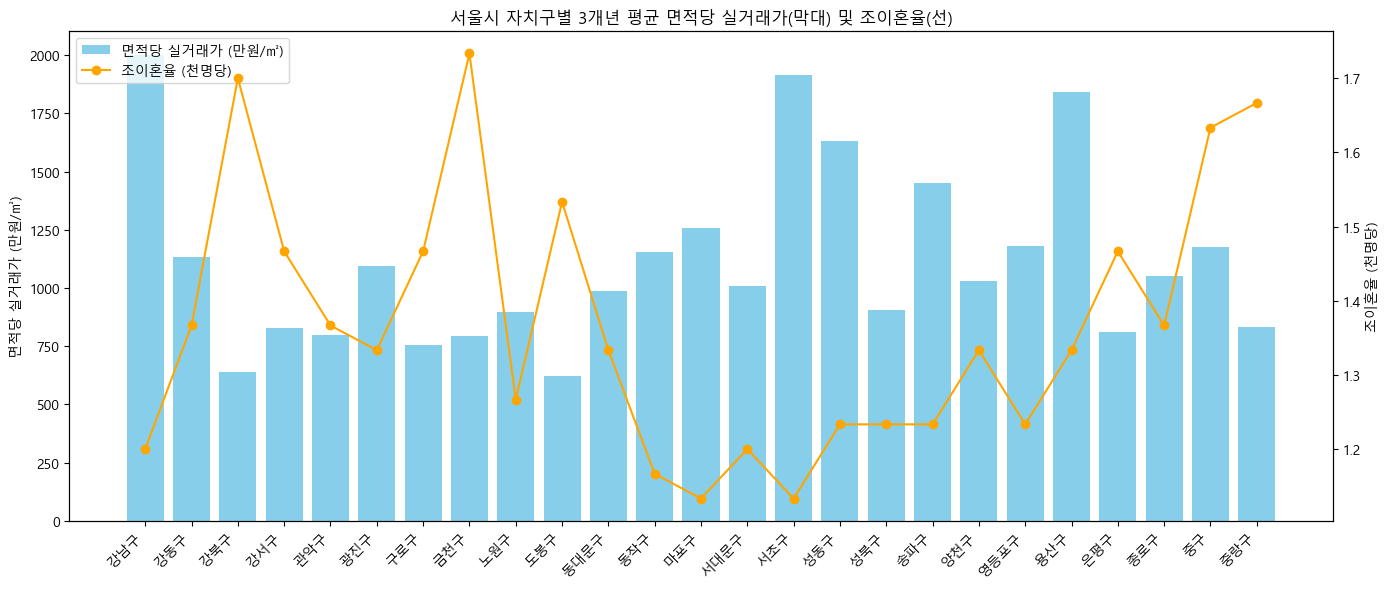

In [8]:
#3년치 실거래가/선물면적 평균값
# 1. 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2. 한글 폰트 설정 (깨짐 방지)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Mac은 'AppleGothic', Colab은 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 3. 파일 불러오기
real_estate_2022 = pd.read_csv("서울시 부동산 실거래가 정보 2022 FF.csv", encoding="euc-kr")
real_estate_2023 = pd.read_csv("서울시 부동산 실거래가 정보 2023 FF.csv", encoding="euc-kr")
real_estate_2024 = pd.read_csv("서울시 부동산 실거래가 정보 2024FF.csv", encoding="euc-kr")
divorce_df = pd.read_excel("이혼건수+및+조이혼율_20250522165332.xlsx", header=1)

# 4. 연도별 요약 데이터 처리 함수
def get_yearly_summary(real_estate_df, divorce_df, year_label):
    real_estate_df["면적당실거래가"] = real_estate_df["물건금액(만원)"] / real_estate_df["건물면적(㎡)"]
    area_price = real_estate_df.groupby("자치구명")["면적당실거래가"].mean().reset_index()
    area_price.columns = ["자치구", "면적당실거래가"]

    if year_label == 2022:
        divorce_col = "조이혼율 (천명당).2"
    elif year_label == 2023:
        divorce_col = "조이혼율 (천명당).1"
    elif year_label == 2024:
        divorce_col = "조이혼율 (천명당)"
    else:
        raise ValueError("해당 연도 조이혼율 열이 존재하지 않습니다.")

    divorce_data = divorce_df[["자치구별(2)", divorce_col]].dropna()
    divorce_data.columns = ["자치구", "조이혼율"]

    return pd.merge(area_price, divorce_data, on="자치구")

# 5. 연도별 데이터 불러오기
summary_2022 = get_yearly_summary(real_estate_2022, divorce_df, 2022)
summary_2023 = get_yearly_summary(real_estate_2023, divorce_df, 2023)
summary_2024 = get_yearly_summary(real_estate_2024, divorce_df, 2024)

# 6. 병합 및 평균 계산
summary_mean = (
    summary_2022.merge(summary_2023, on="자치구", suffixes=("_2022", "_2023"))
    .merge(summary_2024, on="자치구")
)

summary_mean["평균_면적당실거래가"] = summary_mean[["면적당실거래가_2022", "면적당실거래가_2023", "면적당실거래가"]].mean(axis=1)
summary_mean["평균_조이혼율"] = summary_mean[["조이혼율_2022", "조이혼율_2023", "조이혼율"]].mean(axis=1)

summary_mean = summary_mean[["자치구", "평균_면적당실거래가", "평균_조이혼율"]].sort_values("자치구")

# 7. 시각화
x = np.arange(len(summary_mean["자치구"]))
fig, ax1 = plt.subplots(figsize=(14, 6))

# 막대: 평균 면적당 실거래가
bars = ax1.bar(x, summary_mean["평균_면적당실거래가"], color='skyblue', label="면적당 실거래가 (만원/㎡)")
ax1.set_ylabel("면적당 실거래가 (만원/㎡)")
ax1.set_xticks(x)
ax1.set_xticklabels(summary_mean["자치구"], rotation=45, ha='right')

# 선: 평균 조이혼율
ax2 = ax1.twinx()
line = ax2.plot(x, summary_mean["평균_조이혼율"], color='orange', marker='o', label="조이혼율 (천명당)")
ax2.set_ylabel("조이혼율 (천명당)")

# 범례
lines_labels = [bars, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper left')

plt.title("서울시 자치구별 3개년 평균 면적당 실거래가(막대) 및 조이혼율(선)")
plt.tight_layout()
plt.show()


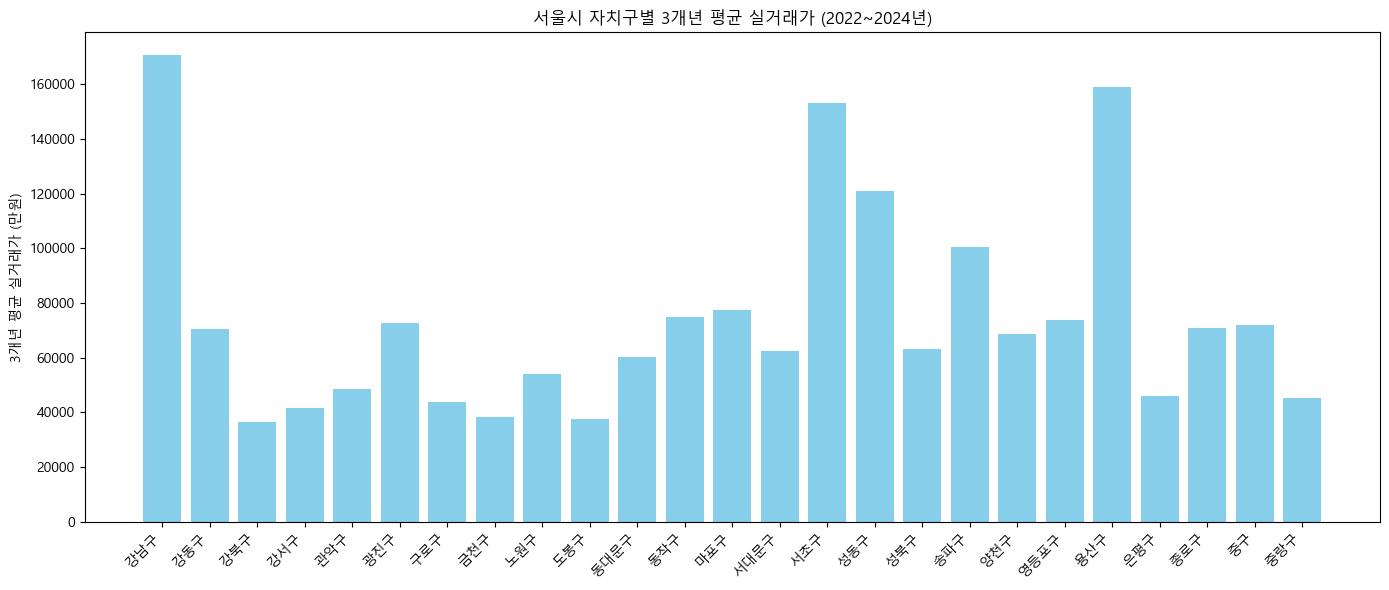

In [9]:
#3년치 실거래가 평균값
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ✅ 한글 폰트 설정 (Windows 기준: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'       # Windows
# plt.rcParams['font.family'] = 'AppleGothic'        # macOS
# plt.rcParams['font.family'] = 'NanumGothic'        # Google Colab 등
plt.rcParams['axes.unicode_minus'] = False

# 1. CSV 파일 불러오기
df_2022 = pd.read_csv("서울시 부동산 실거래가 정보 2022.csv", encoding="euc-kr")
df_2023 = pd.read_csv("서울시 부동산 실거래가 정보 2023.csv", encoding="euc-kr")
df_2024 = pd.read_csv("서울시 부동산 실거래가 정보 2024.csv", encoding="euc-kr")

# 2. 열 이름 공백 제거
for df in [df_2022, df_2023, df_2024]:
    df.columns = df.columns.str.strip()

# 3. 자치구별 평균 실거래가 계산
mean_2022 = df_2022.groupby("자치구명")["물건금액(만원)"].mean().reset_index()
mean_2023 = df_2023.groupby("자치구명")["물건금액(만원)"].mean().reset_index()
mean_2024 = df_2024.groupby("자치구명")["물건금액(만원)"].mean().reset_index()

# 4. 열 이름 정리
mean_2022.columns = ["자치구", "2022"]
mean_2023.columns = ["자치구", "2023"]
mean_2024.columns = ["자치구", "2024"]

# 5. 병합 및 3년 평균 계산
merged = mean_2022.merge(mean_2023, on="자치구").merge(mean_2024, on="자치구")
merged["3년평균"] = merged[["2022", "2023", "2024"]].mean(axis=1)
merged = merged.sort_values("자치구")

# 6. 시각화
x = np.arange(len(merged["자치구"]))
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(x, merged["3년평균"], color='skyblue')

ax.set_xticks(x)
ax.set_xticklabels(merged["자치구"], rotation=45, ha='right')
ax.set_ylabel("3개년 평균 실거래가 (만원)")
ax.set_title("서울시 자치구별 3개년 평균 실거래가 (2022~2024년)")

plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


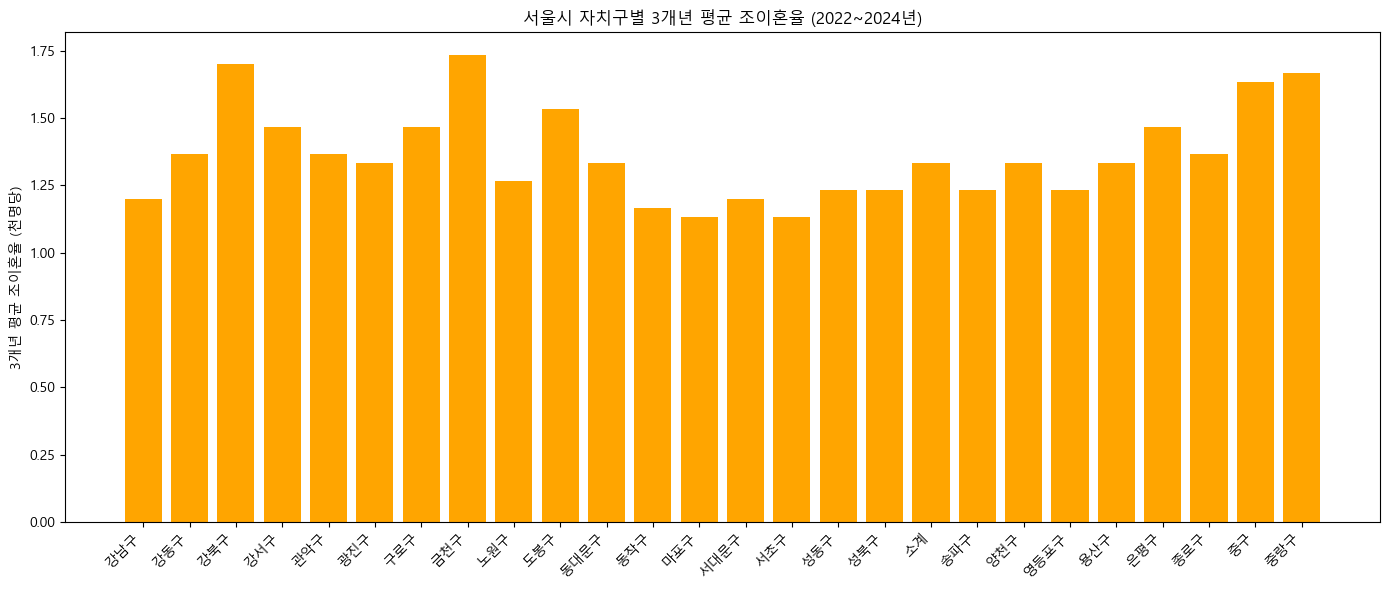

In [10]:
# 3년치 조이혼율 평균값
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정 (Windows 기준, Colab은 'NanumGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 엑셀 파일 불러오기
divorce_df = pd.read_excel("이혼건수+및+조이혼율_20250522165332.xlsx", header=1)

# 열 이름 정리 및 필요한 열만 선택
divorce_df.columns = divorce_df.columns.str.strip()
divorce_data = divorce_df[["자치구별(2)", "조이혼율 (천명당).2", "조이혼율 (천명당).1", "조이혼율 (천명당)"]].dropna()
divorce_data.columns = ["자치구", "2022", "2023", "2024"]

# 3개년 평균 조이혼율 계산
divorce_data["3년평균"] = divorce_data[["2022", "2023", "2024"]].mean(axis=1)
divorce_data = divorce_data.sort_values("자치구")

# 시각화
x = np.arange(len(divorce_data["자치구"]))
fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(x, divorce_data["3년평균"], color='orange')
ax.set_xticks(x)
ax.set_xticklabels(divorce_data["자치구"], rotation=45, ha='right')
ax.set_ylabel("3개년 평균 조이혼율 (천명당)")
ax.set_title("서울시 자치구별 3개년 평균 조이혼율 (2022~2024년)")

plt.tight_layout()
plt.show()



In [12]:
import pandas as pd

data = [
    # 2022년
    ["강남구", 1545.294917, 1.2, 2022], ["강동구", 932.720479, 1.3, 2022], ["강북구", 588.746127, 1.5, 2022],
    ["강서구", 770.096441, 1.4, 2022], ["관악구", 785.019876, 1.3, 2022], ["광진구", 956.111678, 1.3, 2022],
    ["구로구", 692.919607, 1.4, 2022], ["금천구", 783.318328, 1.8, 2022], ["노원구", 874.550650, 1.2, 2022],
    ["도봉구", 590.425671, 1.5, 2022], ["동대문구", 878.761307, 1.4, 2022], ["동작구", 1035.564417, 1.2, 2022],
    ["마포구", 1095.837878, 1.1, 2022], ["서대문구", 906.537704, 1.1, 2022], ["서초구", 1489.370015, 1.2, 2022],
    ["성동구", 1615.261835, 1.3, 2022], ["성북구", 823.094043, 1.3, 2022], ["송파구", 1157.764869, 1.2, 2022],
    ["양천구", 796.847007, 1.3, 2022], ["영등포구", 1048.670874, 1.2, 2022], ["용산구", 1624.406861, 1.1, 2022],
    ["은평구", 735.395177, 1.4, 2022], ["종로구", 994.746521, 1.2, 2022], ["중구", 1031.133072, 1.5, 2022],
    ["중랑구", 808.003844, 1.6, 2022],

    # 2023년
    ["강남구", 2125.185000, 1.1, 2023], ["강동구", 1170.002473, 1.4, 2023], ["강북구", 642.401468, 1.7, 2023],
    ["강서구", 834.444939, 1.5, 2023], ["관악구", 786.702020, 1.4, 2023], ["광진구", 1092.300059, 1.3, 2023],
    ["구로구", 762.462900, 1.5, 2023], ["금천구", 777.702589, 1.6, 2023], ["노원구", 901.839236, 1.3, 2023],
    ["도봉구", 628.746819, 1.5, 2023], ["동대문구", 991.614367, 1.2, 2023], ["동작구", 1134.297532, 1.1, 2023],
    ["마포구", 1261.217979, 1.2, 2023], ["서대문구", 1001.758194, 1.2, 2023], ["서초구", 1950.525821, 1.1, 2023],
    ["성동구", 1535.951074, 1.2, 2023], ["성북구", 923.074483, 1.2, 2023], ["송파구", 1548.326043, 1.2, 2023],
    ["양천구", 1123.623016, 1.3, 2023], ["영등포구", 1177.692943, 1.2, 2023], ["용산구", 1912.162949, 1.5, 2023],
    ["은평구", 851.582505, 1.5, 2023], ["종로구", 1100.372204, 1.4, 2023], ["중구", 1192.407224, 1.7, 2023],
    ["중랑구", 821.019869, 1.6, 2023],

    # 2024년
    ["강남구", 2337.142151, 1.3, 2024], ["강동구", 1294.111472, 1.4, 2024], ["강북구", 682.824306, 1.9, 2024],
    ["강서구", 874.165161, 1.5, 2024], ["관악구", 827.200391, 1.4, 2024], ["광진구", 1232.442741, 1.4, 2024],
    ["구로구", 813.381891, 1.5, 2024], ["금천구", 823.240355, 1.8, 2024], ["노원구", 918.183734, 1.3, 2024],
    ["도봉구", 648.806041, 1.6, 2024], ["동대문구", 1088.170710, 1.4, 2024], ["동작구", 1296.143888, 1.2, 2024],
    ["마포구", 1410.664864, 1.1, 2024], ["서대문구", 1110.828157, 1.3, 2024], ["서초구", 2302.366267, 1.1, 2024],
    ["성동구", 1743.080119, 1.2, 2024], ["성북구", 973.072361, 1.2, 2024], ["송파구", 1647.083675, 1.3, 2024],
    ["양천구", 1163.600991, 1.4, 2024], ["영등포구", 1317.719387, 1.3, 2024], ["용산구", 1991.978832, 1.4, 2024],
    ["은평구", 839.498436, 1.5, 2024], ["종로구", 1061.790045, 1.5, 2024], ["중구", 1299.277590, 1.7, 2024],
    ["중랑구", 863.694202, 1.8, 2024]
]

columns = ["자치구", "면적당실거래가", "조이혼율", "연도"]
filtered_data = pd.DataFrame(data, columns=columns)

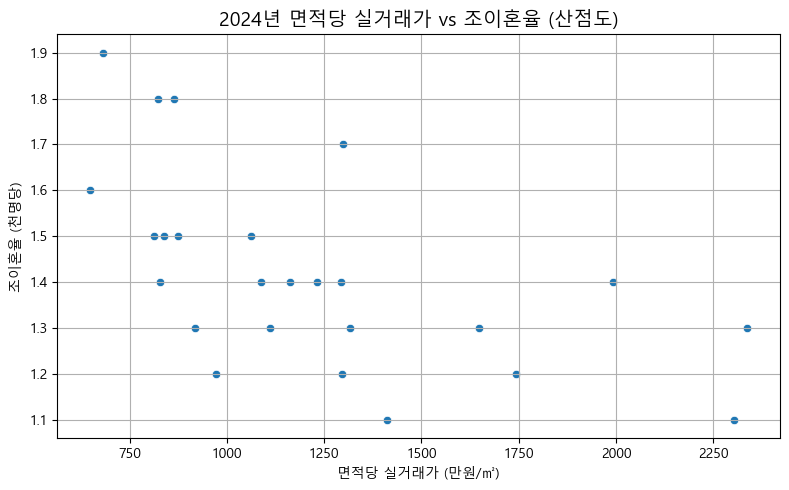

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


df_2024 = filtered_data[filtered_data["연도"] == 2024]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_2024, x="면적당실거래가", y="조이혼율")
plt.title("2024년 면적당 실거래가 vs 조이혼율 (산점도)", fontsize=14)
plt.xlabel("면적당 실거래가 (만원/㎡)")
plt.ylabel("조이혼율 (천명당)")
plt.grid(True)
plt.tight_layout()
plt.show()

기울기 (slope): -0.0003
절편 (intercept): 1.7394
결정계수 (R-squared): 0.3305
p-값 (p-value): 0.0026
표준오차 (std_err): 0.0001


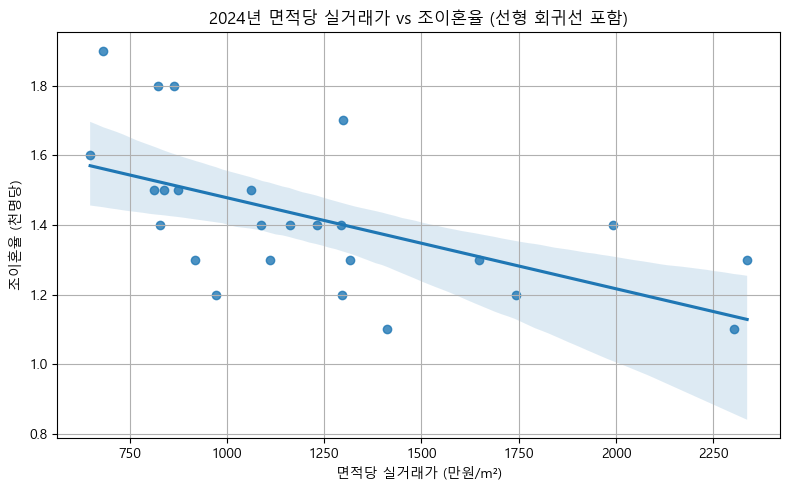

In [15]:

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 2024년만 추출
df_2024 = filtered_data[filtered_data["연도"] == 2024]

# 독립변수와 종속변수 지정
x = df_2024["면적당실거래가"]
y = df_2024["조이혼율"]

# 회귀분석 수행
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# 결과 출력
print(f"기울기 (slope): {slope:.4f}")
print(f"절편 (intercept): {intercept:.4f}")
print(f"결정계수 (R-squared): {r_value**2:.4f}")
print(f"p-값 (p-value): {p_value:.4f}")
print(f"표준오차 (std_err): {std_err:.4f}")

# 시각화
plt.figure(figsize=(8, 5))
sns.regplot(data=df_2024, x="면적당실거래가", y="조이혼율")
plt.title("2024년 면적당 실거래가 vs 조이혼율 (선형 회귀선 포함)")
plt.xlabel("면적당 실거래가 (만원/m²)")
plt.ylabel("조이혼율 (천명당)")
plt.grid(True)
plt.tight_layout()
plt.show()